In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_row", None)
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import re
from num2words import num2words

In [3]:
df = pd.read_csv("all_sorted_collection.csv")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english')

full = " ".join([str(t) for t in df.Text])
# remove punctuation
full_no_punc = re.sub(r"\.|!", "",full)
full_no_punc = " ".join([i for i in full_no_punc.split() if len(i)>1])

# Tokenize
text_tokens = word_tokenize(full_no_punc)
# np.save("text_tokens",text_tokens)

# # Change to lower case and select only alphanumeric
# text_tokens = np.load("text_tokens.npy").tolist()
pre_process = [i.lower() for i in text_tokens if i.isalnum()]

# Remove Stop Words,# remove_single_characters
token_no_stopword = [word for word in pre_process if word not in stop_words]


filtered_sentence = (" ").join(token_no_stopword)
# np.save("filtered_sentences",filtered_sentence)
# filtered_sentence = np.load("filtered_sentences.npy").tolist()


In [4]:
# Look at the most common words
from collections import Counter
Counter = Counter(token_no_stopword)
print(Counter.most_common(50))

[('papers', 20290), ('letters', 16584), ('john', 12735), ('items', 10908), ('letter', 10792), ('william', 9892), ('collection', 9313), ('co', 8261), ('family', 7449), ('james', 6722), ('county', 6709), ('war', 6465), ('also', 6460), ('added', 6275), ('va', 5873), ('new', 5752), ('see', 5529), ('carolina', 5428), ('north', 5357), ('sketch', 5213), ('item', 4950), ('one', 4907), ('thomas', 4905), ('pp', 4750), ('henry', 4673), ('book', 4609), ('george', 4527), ('ndhyme', 4378), ('may', 4267), ('two', 4101), ('virginia', 4042), ('general', 3921), ('first', 3836), ('correspondence', 3785), ('charles', 3673), ('army', 3599), ('south', 3402), ('state', 3225), ('records', 3211), ('business', 3196), ('2', 3146), ('written', 3095), ('robert', 3085), ('sir', 3039), ('washington', 3039), ('section', 2989), ('card', 2922), ('life', 2907), ('history', 2871), ('many', 2870)]


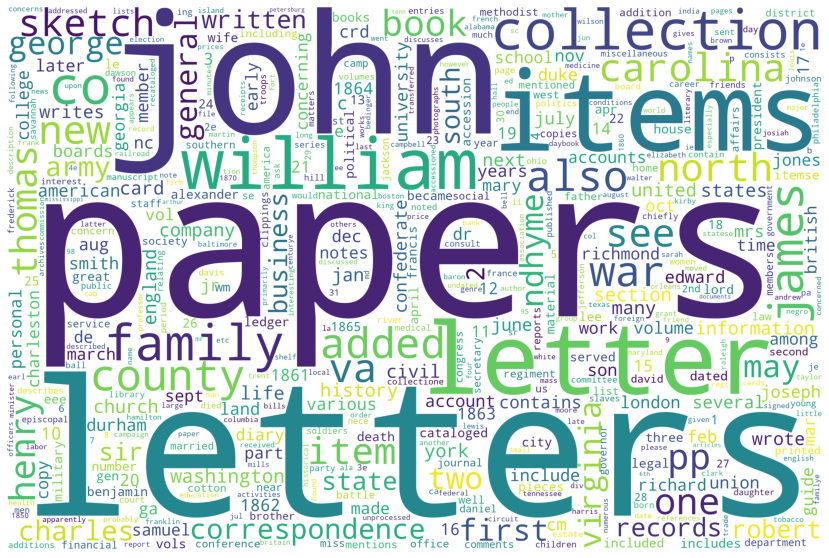

In [5]:
# Let's plot wordcloud based on frequency of word occurence

# function to change the plot to black & white
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")

wordcloud = WordCloud(stopwords=stop_words,background_color="white", width=3000, height=2000, max_words=500,collocations=True).generate_from_frequencies(Counter)

# change it to black&white optional
# wordcloud.recolor(color_func = black_color_func)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

This wordcloud shows the major categories of the text like papers, books, accounts, collection and letters. But let's remove these common categorical words to better understand the most frequent topics.

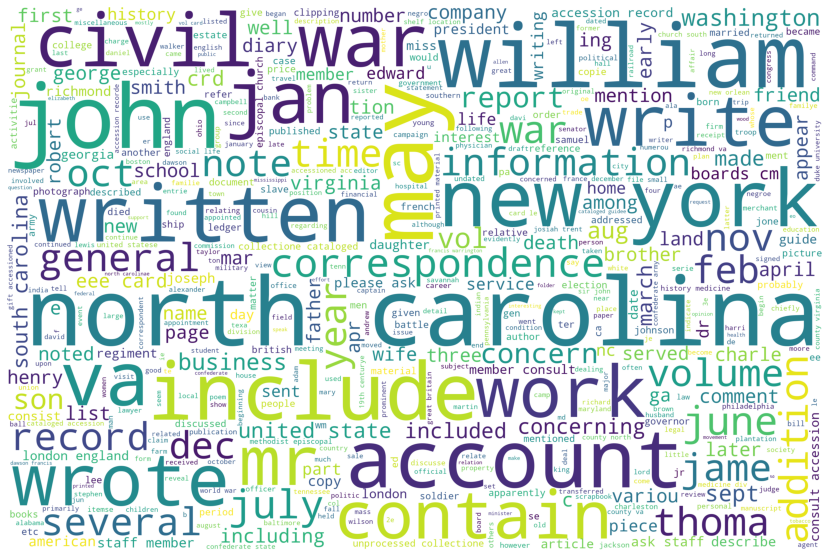

In [6]:
# Add the words to the stop words list
stop_words.extend(["papers","letters",
"items","letter","collection","family","co","also","added","see","sketch","one","two","ten", "pp","book","section","ndhyme","many","item","next"])
wordcloud = WordCloud(stopwords=stop_words,background_color="white", width=3000, height=2000, max_words=500,collocations=True).generate(filtered_sentence)
# wordcloud.recolor(color_func = black_color_func)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

We have better plot, but let's add months to the stop word list

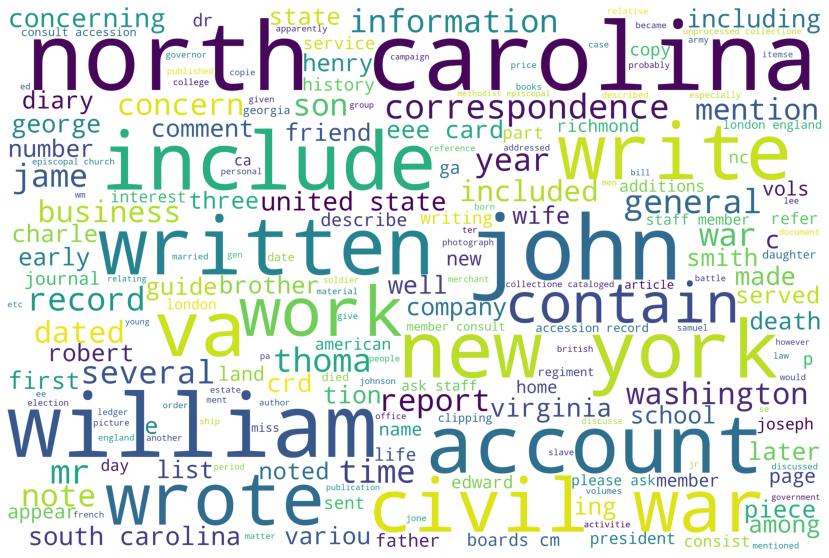

In [7]:
stop_words.extend(['dec', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov',
"december","january","febraury","march","april","may","june","july","august","september","october","november","vol","volume","addition","sept"])
wordcloud = WordCloud(stopwords=stop_words,background_color="white", width=3000, height=2000, max_words=200,collocations=True,prefer_horizontal=1).generate(filtered_sentence)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

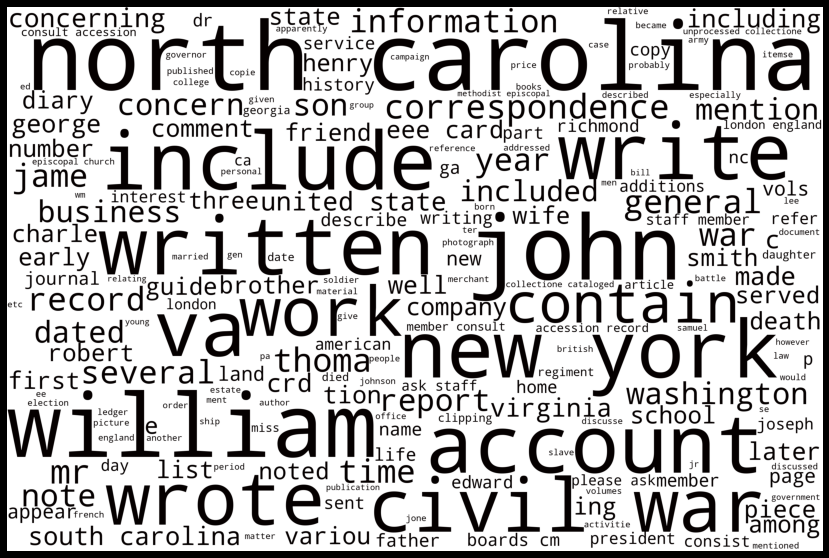

In [8]:
#Change the above plot to black and white
wordcloud.recolor(color_func = black_color_func)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

According to the plot, we have recurring themes such as the civil war, family relationships(father, brother, daughter, wife), business, history and war diary. Common places are North Carolina, South Carolina Virginia, Washington.